# DIABETES PREDICTION

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Importing  libraries

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [8]:
data = pd.read_csv("/content/drive/MyDrive//content/drive/MyDrive/~./DIPLOMA/project 6th sem/Detaset/diabetes.csv")
data

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive//content/drive/MyDrive/~./DIPLOMA/project 6th sem/Detaset/diabetes.csv'

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 648 entries, 0 to 647
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   sno         648 non-null    int64  
 1   Name        648 non-null    object 
 2   age         648 non-null    int64  
 3   Gender      648 non-null    object 
 4   FPG         633 non-null    float64
 5   Chol        634 non-null    float64
 6   Tri         631 non-null    float64
 7   HDL         631 non-null    float64
 8   LDL         648 non-null    float64
 9   ALT         170 non-null    float64
 10  Creatinine  344 non-null    float64
 11  Diabetes    648 non-null    int64  
dtypes: float64(7), int64(3), object(2)
memory usage: 60.9+ KB



# Summary of data

In [ ]:
data.describe()

,sno,age,FPG,Chol,Tri,HDL,LDL,ALT,Creatinine,Diabetes
count,648.000000,648.000000,633.000000,634.000000,631.000000,631.000000,648.000000,170.000000,344.000000,648.000000
mean,324.500000,50.168210,168.280837,200.396530,175.679873,44.302694,118.638889,32.639059,1.946962,0.500000
std,187.205769,14.443872,87.078415,88.790512,103.703418,4.570295,87.335702,29.985464,6.847660,0.500386
min,1.000000,6.000000,10.400000,14.000000,38.000000,18.000000,-55.000000,1.730000,0.090000,0.000000
25%,162.750000,40.000000,94.000000,164.000000,106.000000,42.000000,89.150000,16.712500,0.930000,0.000000
50%,324.500000,50.000000,143.200000,193.500000,148.000000,44.000000,113.200000,22.450000,0.990000,0.500000
75%,486.250000,60.000000,227.000000,230.000000,214.000000,46.000000,146.400000,36.145000,1.162500,1.000000
max,648.000000,100.000000,490.300000,2058.000000,974.000000,73.000000,1990.200000,286.400000,94.340000,1.000000


# Deleting sno,Name column

In [ ]:
# Delete columns directly by specifying their names
columns_to_delete = ['sno', 'Name']  # List of column names to delete
data.drop(columns=columns_to_delete, inplace=True)


In [ ]:
data

,age,Gender,FPG,Chol,Tri,HDL,LDL,ALT,Creatinine,Diabetes
0,50,F,94.9,182.0,134.0,44.0,111.2,NaN,0.86,0
1,27,M,NaN,142.0,83.0,38.0,87.4,83.10,0.90,0
2,46,M,101.0,NaN,NaN,NaN,0.0,12.02,0.95,0
3,22,F,NaN,148.0,90.0,38.0,92.0,13.20,NaN,0
4,40,F,121.0,NaN,NaN,NaN,0.0,14.26,0.93,0
...,...,...,...,...,...,...,...,...,...,...
643,45,F,292.5,195.0,148.0,45.0,120.4,NaN,NaN,1
644,55,M,213.6,300.0,188.0,54.0,208.4,NaN,NaN,1
645,43,F,266.6,240.0,562.0,48.0,79.6,NaN,NaN,1
646,56,F,218.0,224.0,81.0,45.0,162.8,36.00,0.98,1


In [ ]:
data.isnull().sum()

age             0
Gender          0
FPG            15
Chol           14
Tri            17
HDL            17
LDL             0
ALT           478
Creatinine    304
Diabetes        0
dtype: int64

In [ ]:
 data.isna().sum()

age             0
Gender          0
FPG            15
Chol           14
Tri            17
HDL            17
LDL             0
ALT           478
Creatinine    304
Diabetes        0
dtype: int64

In [ ]:
data

,age,Gender,FPG,Chol,Tri,HDL,LDL,ALT,Creatinine,Diabetes
0,50,F,94.9,182.0,134.0,44.0,111.2,NaN,0.86,0
1,27,M,NaN,142.0,83.0,38.0,87.4,83.10,0.90,0
2,46,M,101.0,NaN,NaN,NaN,0.0,12.02,0.95,0
3,22,F,NaN,148.0,90.0,38.0,92.0,13.20,NaN,0
4,40,F,121.0,NaN,NaN,NaN,0.0,14.26,0.93,0
...,...,...,...,...,...,...,...,...,...,...
643,45,F,292.5,195.0,148.0,45.0,120.4,NaN,NaN,1
644,55,M,213.6,300.0,188.0,54.0,208.4,NaN,NaN,1
645,43,F,266.6,240.0,562.0,48.0,79.6,NaN,NaN,1
646,56,F,218.0,224.0,81.0,45.0,162.8,36.00,0.98,1


# Mapping

In [ ]:
data["Gender"]=data["Gender"].map({"M":1,"F":0})
data["Gender"]

0      0
1      1
2      1
3      0
4      0
      ..
643    0
644    1
645    0
646    0
647    1
Name: Gender, Length: 648, dtype: int64

In [ ]:
data.head()

,age,Gender,FPG,Chol,Tri,HDL,LDL,ALT,Creatinine,Diabetes
0,50,0,94.9,182.0,134.0,44.0,111.2,NaN,0.86,0
1,27,1,NaN,142.0,83.0,38.0,87.4,83.10,0.90,0
2,46,1,101.0,NaN,NaN,NaN,0.0,12.02,0.95,0
3,22,0,NaN,148.0,90.0,38.0,92.0,13.20,NaN,0
4,40,0,121.0,NaN,NaN,NaN,0.0,14.26,0.93,0


<AxesSubplot: xlabel='Diabetes'>

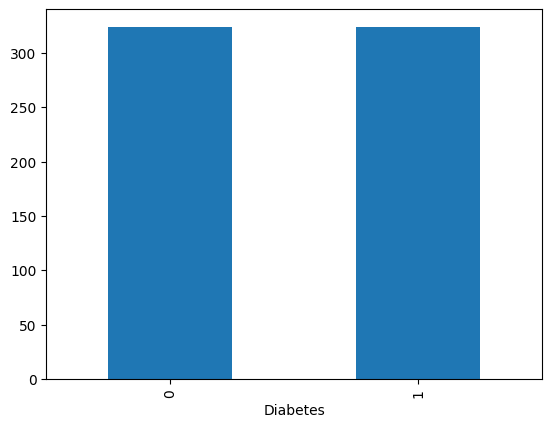

In [ ]:
data["Diabetes"].value_counts().plot.bar()

In [ ]:
data["Diabetes"].value_counts()

Diabetes
0    324
1    324
Name: count, dtype: int64

# Forward filling to NAN

In [ ]:
new_data = data.fillna(method='ffill', axis=1)

C:\Users\lib_2\AppData\Local\Temp\ipykernel_7276\3436043026.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  new_data = data.fillna(method='ffill', axis=1)


In [ ]:
new_data

,age,Gender,FPG,Chol,Tri,HDL,LDL,ALT,Creatinine,Diabetes
0,50.0,0.0,94.9,182.0,134.0,44.0,111.2,111.20,0.86,0.0
1,27.0,1.0,1.0,142.0,83.0,38.0,87.4,83.10,0.90,0.0
2,46.0,1.0,101.0,101.0,101.0,101.0,0.0,12.02,0.95,0.0
3,22.0,0.0,0.0,148.0,90.0,38.0,92.0,13.20,13.20,0.0
4,40.0,0.0,121.0,121.0,121.0,121.0,0.0,14.26,0.93,0.0
...,...,...,...,...,...,...,...,...,...,...
643,45.0,0.0,292.5,195.0,148.0,45.0,120.4,120.40,120.40,1.0
644,55.0,1.0,213.6,300.0,188.0,54.0,208.4,208.40,208.40,1.0
645,43.0,0.0,266.6,240.0,562.0,48.0,79.6,79.60,79.60,1.0
646,56.0,0.0,218.0,224.0,81.0,45.0,162.8,36.00,0.98,1.0


In [ ]:
 new_data.isna().sum()

age           0
Gender        0
FPG           0
Chol          0
Tri           0
HDL           0
LDL           0
ALT           0
Creatinine    0
Diabetes      0
dtype: int64

In [ ]:
new_data.to_csv('cleaned_diabetes_data.csv', index=False)

# Train test split

In [ ]:
X = new_data.drop("Diabetes", axis=1)
Y = new_data["Diabetes"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2,random_state=50,shuffle=True)

In [ ]:
X.head()

,age,Gender,FPG,Chol,Tri,HDL,LDL,ALT,Creatinine
0,50.0,0.0,94.9,182.0,134.0,44.0,111.2,111.20,0.86
1,27.0,1.0,1.0,142.0,83.0,38.0,87.4,83.10,0.90
2,46.0,1.0,101.0,101.0,101.0,101.0,0.0,12.02,0.95
3,22.0,0.0,0.0,148.0,90.0,38.0,92.0,13.20,13.20
4,40.0,0.0,121.0,121.0,121.0,121.0,0.0,14.26,0.93


In [ ]:
Y.tail(10)

638    1.0
639    1.0
640    1.0
641    1.0
642    1.0
643    1.0
644    1.0
645    1.0
646    1.0
647    1.0
Name: Diabetes, dtype: float64

In [ ]:
X_train.head()

,age,Gender,FPG,Chol,Tri,HDL,LDL,ALT,Creatinine
407,48.0,0.0,402.9,236.0,230.0,46.0,144.0,144.0,1.14
489,54.0,0.0,270.2,252.0,139.0,48.0,176.2,176.2,176.20
67,22.0,1.0,82.0,162.0,104.0,40.0,101.2,11.1,11.10
405,50.0,1.0,296.0,176.0,430.0,43.0,47.0,47.0,47.00
276,36.0,1.0,123.8,198.0,239.0,44.0,106.2,106.2,106.20


# Training the Model

# 1.Logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model_LR = LogisticRegression()
model_LR= make_pipeline(StandardScaler(), LogisticRegression())
model_LR.fit(X_train, Y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [ ]:
predictions_LR = model_LR.predict(X_test)
print(predictions_LR)

[0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 0. 1. 0. 1. 0. 1. 1.
 1. 0. 0. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 1. 0. 1. 1.
 0. 0. 1. 1. 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 0. 0.
 0. 0. 1. 0. 1. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 1. 0. 0. 0. 1. 0. 0. 0. 0.]


In [ ]:
df_lr=pd.DataFrame({'Actual':Y_test,'Predicted':predictions_LR})
df_lr.head()

,Actual,Predicted
172,0.0,0.0
18,0.0,0.0
545,1.0,1.0
533,1.0,1.0
524,1.0,1.0


In [ ]:
accuracy_LR = accuracy_score(predictions_LR, Y_test)
print("Logistic regression:",accuracy_LR)

Logistic regression: 0.9


# 2.Random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model_RF = RandomForestClassifier()
model_RF= make_pipeline(StandardScaler(), RandomForestClassifier())
model_RF.fit(X_train, Y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier', RandomForestClassifier())])

In [ ]:
predictions_RF = model_RF.predict(X_test)
print(predictions_RF)


[0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 0. 1. 0. 1. 0. 1. 1.
 1. 0. 0. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 1. 0. 1. 1.
 0. 0. 1. 1. 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 0. 0.
 0. 0. 1. 0. 1. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 0. 0. 1. 0. 0. 0. 0.]


In [ ]:
accuracy_RF = accuracy_score(predictions_RF, Y_test)
print("Random Forest Classifier Accuracy:", accuracy_RF)

Random Forest Classifier Accuracy: 0.9076923076923077


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
cr=classification_report(Y_test,predictions_RF)
print(cr)

              precision    recall  f1-score   support

         0.0       0.89      0.94      0.92        72
         1.0       0.93      0.86      0.89        58

    accuracy                           0.91       130
   macro avg       0.91      0.90      0.91       130
weighted avg       0.91      0.91      0.91       130



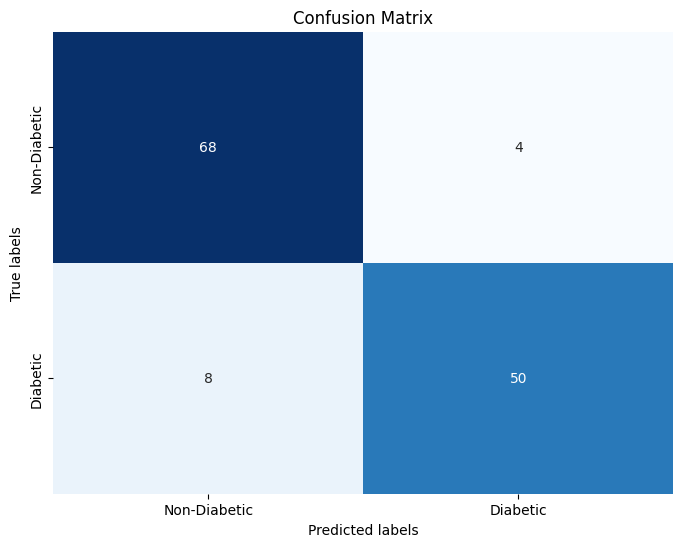

In [ ]:
# Define labels
labels = ['Non-Diabetic', 'Diabetic']

# Compute confusion matrix
cm = confusion_matrix(Y_test, predictions_RF)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

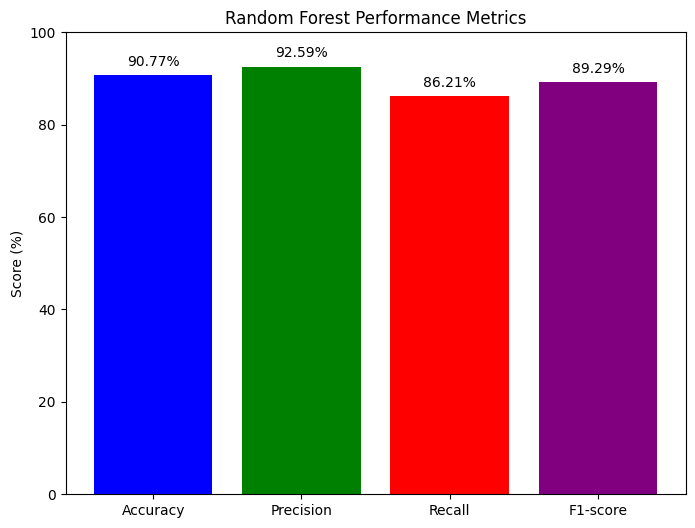

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Example metrics (replace with your actual values)
accuracy = accuracy_score(Y_test, predictions_RF)
precision = precision_score(Y_test, predictions_RF)
recall = recall_score(Y_test, predictions_RF)
f1 = f1_score(Y_test, predictions_RF)

# Convert scores to percentages
accuracy_percentage = accuracy * 100
precision_percentage = precision * 100
recall_percentage = recall * 100
f1_percentage = f1 * 100

# Plot metrics
metrics = {'Accuracy': accuracy_percentage, 'Precision': precision_percentage,
           'Recall': recall_percentage, 'F1-score': f1_percentage}

plt.figure(figsize=(8, 6))
plt.bar(metrics.keys(), metrics.values(), color=['blue', 'green', 'red', 'purple'])
plt.ylabel('Score (%)')  # Adjust y-axis label
plt.title('Random Forest Performance Metrics')
plt.ylim(0, 100)  # Limit y-axis to the range [0, 100]

# Display percentages on top of the bars
for i, v in enumerate(metrics.values()):
    plt.text(i, v + 2, f'{v:.2f}%', ha='center')

plt.show()


In [ ]:
from sklearn.metrics import roc_curve, auc

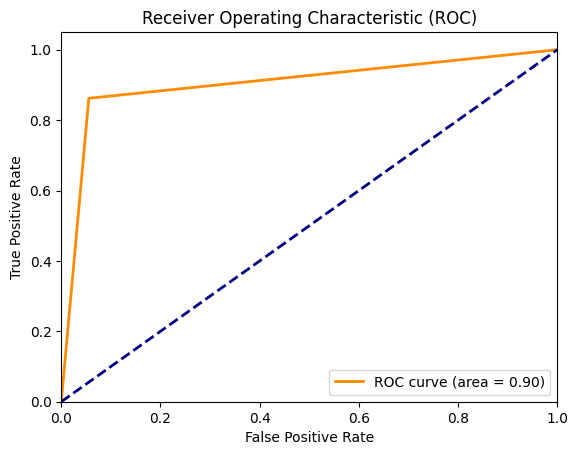

In [ ]:
# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(Y_test,predictions_RF)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

# 3.Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
model_DT = DecisionTreeClassifier()
model_DT= make_pipeline(StandardScaler(), DecisionTreeClassifier())
model_DT.fit(X_train, Y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('decisiontreeclassifier', DecisionTreeClassifier())])

In [ ]:
predictions_DT = model_DT.predict(X_test)
print(predictions_DT)

[0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 0. 0. 1.
 1. 0. 0. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 0. 0. 1. 1. 0. 1. 1. 0. 1. 1.
 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 1. 1. 0. 1.
 0. 0. 1. 1. 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 0. 0.
 0. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0. 0. 1. 0.
 0. 1. 0. 0. 0. 1. 0. 0. 0. 0.]


In [ ]:
accuracy_DT = accuracy_score(predictions_DT, Y_test)
print("Decision Tree:",accuracy_DT)

Decision Tree: 0.8076923076923077


# 4.Support Vector Machine (SVM)

In [ ]:
from sklearn.svm import SVC

In [ ]:
#Create and train Support Vector Machine (SVM)
model_svm = make_pipeline(StandardScaler(), SVC())
model_svm.fit(X_train, Y_train)

Pipeline(steps=[('standardscaler', StandardScaler()), ('svc', SVC())])

In [ ]:
# Make predictions
predictions_svm = model_svm.predict(X_test)
print(predictions_svm)

[0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 0. 1. 0. 1. 0. 1. 1.
 1. 0. 0. 0. 0. 1. 1. 0. 1. 0. 1. 1. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 1. 0. 1. 1.
 0. 0. 1. 1. 1. 0. 0. 1. 1. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 1. 1. 0. 0. 0.
 0. 0. 1. 0. 1. 1. 1. 0. 1. 0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 0. 0. 1. 0. 0. 0. 1.]


In [ ]:
# Calculate and print accuracy
accuracy_svm = accuracy_score(predictions_svm, Y_test)
print("SVM Classifier Accuracy:", accuracy_svm)

SVM Classifier Accuracy: 0.8692307692307693


# 5.Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
# Create and train Gradient Boosting model with Pipeline
model_gb = make_pipeline(StandardScaler(), GradientBoostingClassifier())
model_gb.fit(X_train, Y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gradientboostingclassifier', GradientBoostingClassifier())])

In [ ]:
# Make predictions
predictions_gb = model_gb.predict(X_test)

In [ ]:
# Calculate and print accuracy
accuracy_gb = accuracy_score(predictions_gb, Y_test)
print("Gradient Boosting Accuracy:", accuracy_gb)

Gradient Boosting Accuracy: 0.9076923076923077


# 6.Extra Trees

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

In [ ]:
# Create and train Extra Trees model with Pipeline
model_extra_trees = make_pipeline(StandardScaler(), ExtraTreesClassifier())
model_extra_trees.fit(X_train, Y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('extratreesclassifier', ExtraTreesClassifier())])

In [ ]:
# Make predictions
predictions_extra_trees = model_extra_trees.predict(X_test)

In [ ]:
# Calculate and print accuracy
accuracy_extra_trees = accuracy_score(predictions_extra_trees, Y_test)
print("Extra Trees Accuracy:", accuracy_extra_trees)

Extra Trees Accuracy: 0.9


# 7.Gaussian Process Classification (GPC)

In [ ]:
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF

In [ ]:
# Create and train Gaussian Process Classification (GPC) model with Pipeline
model_gpc = make_pipeline(StandardScaler(), GaussianProcessClassifier(kernel=RBF()))
model_gpc.fit(X_train, Y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gaussianprocessclassifier',
                 GaussianProcessClassifier(kernel=RBF(length_scale=1)))])

In [ ]:
# Make predictions
predictions_gpc = model_gpc.predict(X_test)

In [ ]:
# Calculate and print accuracy
accuracy_gpc = accuracy_score(predictions_gpc, Y_test)
print("GPC Accuracy:", accuracy_gpc)

GPC Accuracy: 0.8923076923076924


# 8.XGBoost

In [ ]:
from xgboost import XGBClassifier

In [ ]:
# Create and train XGBoost model with Pipeline
model_xgboost = make_pipeline(StandardScaler(), XGBClassifier())
model_xgboost.fit(X_train, Y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('xgbclassifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

In [ ]:
# Make predictions
predictions_xgboost = model_xgboost.predict(X_test)

In [ ]:
# Calculate and print accuracy
accuracy_xgboost = accuracy_score(predictions_xgboost, Y_test)
print("XGBoost Accuracy:", accuracy_xgboost)

XGBoost Accuracy: 0.8769230769230769


# 9.LightGBM

In [ ]:
from lightgbm import LGBMClassifier

In [ ]:
# Create and train LightGBM model with Pipeline
model_lightgbm = make_pipeline(StandardScaler(), LGBMClassifier())
model_lightgbm.fit(X_train, Y_train)

[LightGBM] [Info] Number of positive: 266, number of negative: 252
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009060 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 981
[LightGBM] [Info] Number of data points in the train set: 518, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.513514 -> initscore=0.054067
[LightGBM] [Info] Start training from score 0.054067
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[L

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('lgbmclassifier', LGBMClassifier())])

In [ ]:
# Make predictions
predictions_lightgbm = model_lightgbm.predict(X_test)

In [ ]:
# Calculate and print accuracy
accuracy_lightgbm = accuracy_score(predictions_lightgbm, Y_test)
print("LightGBM Accuracy:", accuracy_lightgbm)

LightGBM Accuracy: 0.8769230769230769


# 10.MLPClassifier

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
# Create and train Neural Network model with Pipeline
model_nn = make_pipeline(StandardScaler(), MLPClassifier())
model_nn.fit(X_train, Y_train)

C:\Users\lib_2\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('mlpclassifier', MLPClassifier())])

In [ ]:
# Make predictions
predictions_nn = model_nn.predict(X_test)

In [ ]:
# Calculate and print accuracy
accuracy_nn = accuracy_score(predictions_nn, Y_test)
print("Neural Network Accuracy:", accuracy_nn)

Neural Network Accuracy: 0.8692307692307693


In [ ]:
new_data.isna().sum()

age           0
Gender        0
FPG           0
Chol          0
Tri           0
HDL           0
LDL           0
ALT           0
Creatinine    0
Diabetes      0
dtype: int64

In [ ]:
import joblib


In [ ]:
# Save the trained model as .pkl
joblib.dump(model_LR, 'diabetes_c.pkl')

['diabetes_c.pkl']

In [ ]:
new_data

,age,Gender,FPG,Chol,Tri,HDL,LDL,ALT,Creatinine,Diabetes
0,50.0,0.0,94.9,182.0,134.0,44.0,111.2,111.20,0.86,0.0
1,27.0,1.0,1.0,142.0,83.0,38.0,87.4,83.10,0.90,0.0
2,46.0,1.0,101.0,101.0,101.0,101.0,0.0,12.02,0.95,0.0
3,22.0,0.0,0.0,148.0,90.0,38.0,92.0,13.20,13.20,0.0
4,40.0,0.0,121.0,121.0,121.0,121.0,0.0,14.26,0.93,0.0
...,...,...,...,...,...,...,...,...,...,...
643,45.0,0.0,292.5,195.0,148.0,45.0,120.4,120.40,120.40,1.0
644,55.0,1.0,213.6,300.0,188.0,54.0,208.4,208.40,208.40,1.0
645,43.0,0.0,266.6,240.0,562.0,48.0,79.6,79.60,79.60,1.0
646,56.0,0.0,218.0,224.0,81.0,45.0,162.8,36.00,0.98,1.0


In [ ]:
new_d = [[34, 1, 180,170,120,44,100,100,0.86]]

In [ ]:
# Make predictions
predictions = model_LR.predict(new_d)

# Handle and interpret the predictions (e.g., print, display)
print(f"Predicted value: {predictions[0]}")

Predicted value: 1.0


C:\Users\lib_2\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
new_data["Gender"].isnull().sum()

0

In [ ]:
joblib.dump(model_RF, 'diabetes_r.pkl')

['diabetes_r.pkl']

In [ ]:
# Make predictions
predictions = model_RF.predict(new_d)

# Handle and interpret the predictions (e.g., print, display)
print(f"Predicted value: {predictions[0]}")

Predicted value: 1.0


C:\Users\lib_2\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


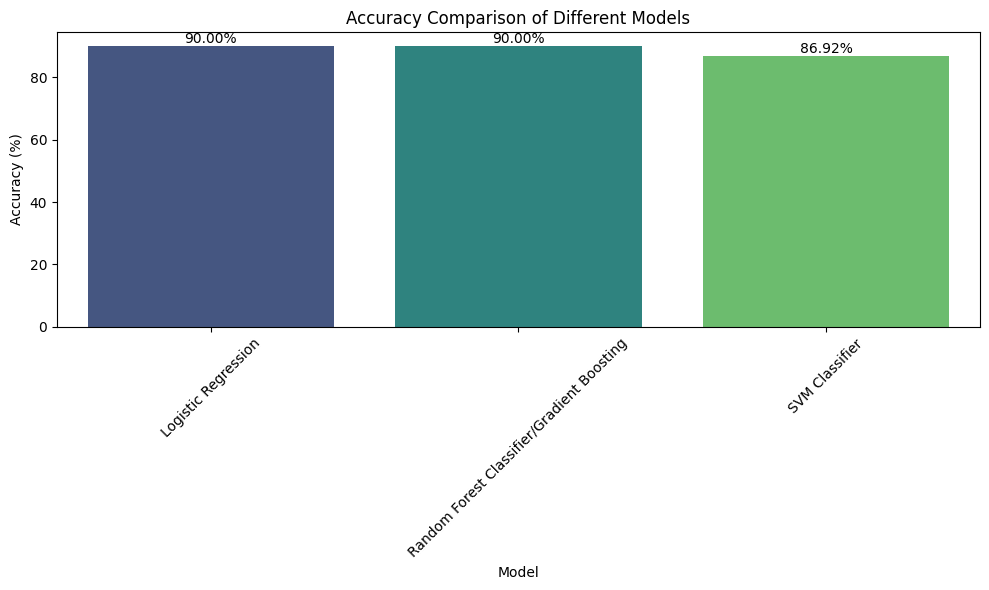

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Train the models and calculate accuracies
models = {
    "Logistic Regression": make_pipeline(StandardScaler(), LogisticRegression()),
    "Random Forest Classifier/Gradient Boosting": make_pipeline(StandardScaler(), RandomForestClassifier()),
    "SVM Classifier": make_pipeline(StandardScaler(), SVC())
}

accuracies = {}
for name, model in models.items():
    model.fit(X_train, Y_train)
    predictions = model.predict(X_test)
    accuracies[name] = accuracy_score(predictions, Y_test)

# Convert accuracies to percentages
accuracies_percentage = {name: accuracy * 100 for name, accuracy in accuracies.items()}

# Create a DataFrame for plotting
df = pd.DataFrame({"Model": list(accuracies_percentage.keys()), "Accuracy": list(accuracies_percentage.values())})

# Plotting using Seaborn
plt.figure(figsize=(10, 6))
ax = sns.barplot(x="Model", y="Accuracy", data=df, palette="viridis")
plt.title("Accuracy Comparison of Different Models")
plt.ylabel("Accuracy (%)")
plt.xticks(rotation=45)

# Annotate bars with accuracy values
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.tight_layout()
plt.show()
